In [2]:
%reload_kedro

[03/08/24 12:53:09] INFO     Resolved project path as:                                              ]8;id=612354;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=491685;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /Users/tony/Documents/phd/courses/PoCS2/spiteful-allegory/work.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/08/24 12:53:09] WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/fram ]8;id=809674;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=203615;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             ework/session/session.py:267: KedroDeprecationWarning: ConfigLoader                   
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/lazy_loade ]8;id=886286;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=519452;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/__init__.py:78: KedroDeprecationWarning: 'TextDataSet' has been                     
                             renamed to 'TextDataset', and the alias will be removed in                            
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    WARNING  /Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/lazy_loade ]8;id=242299;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=491885;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/warnings.py#109\109]8;;\
                             r/__init__.py:78: KedroDeprecationWarning: 'CSVDataSet' has been                      
                             renamed to 'CSVDataset', and the alias will be removed in                             
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project work                                                     ]8;id=127720;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=23736;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=400688;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=442453;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [23]:
import pandas as pd
import re

import matplotlib.pyplot as plt

from work.pipelines.word_helpers.nodes import make_size_rank_dist, parse_text

In [4]:
neurosynth_text = catalog.load('neurosynth_text')
neurosynth_text['source'] = 'neurosynth'

neuroquery_text = catalog.load('neuroquery_text')
neuroquery_text['source'] = 'neuroquery'

text = pd.concat([neurosynth_text, neuroquery_text])
text.head()

                    INFO     Loading data from 'neurosynth_text' (CSVDataset)...                ]8;id=943916;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=156263;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[03/08/24 12:53:10] INFO     Loading data from 'neuroquery_text' (CSVDataset)...                ]8;id=313085;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=487066;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,id,study_id,contrast_id,abstract,source
0,10022492-1,10022492,1,A fundamental characteristic of working memory...,neurosynth
1,10022494-1,10022494,1,Electrophysiological studies on monkeys have b...,neurosynth
2,10022496-1,10022496,1,Most functional imaging studies of the auditor...,neurosynth
3,10051677-1,10051677,1,Positron emission tomography studies were cond...,neurosynth
4,10191322-1,10191322,1,The cortical organization of language in bilin...,neurosynth


In [24]:
def make_sizerank_df(text: str) -> pd.DataFrame:

    parsed = parse_text(text)
    sizerank = make_size_rank_dist(parsed, write_file=False)

    df = pd.DataFrame(sizerank, columns=['ngram', 'count'])
    return df.reset_index(names=['rank'])

sample_abstract = text['abstract'].iloc[0]
make_sizerank_df(sample_abstract)

,rank,ngram,count
0,0,",",11
1,1,of,9
2,2,.,8
3,3,memory,7
4,4,capacity,7
...,...,...,...
127,127,providing,1
128,128,missing,1
129,129,link,1
130,130,current,1


In [13]:
text['abstract'].iloc[2]

'Most functional imaging studies of the auditory system have employed complex stimuli. We used positron emission tomography to map neural responses to 0.5 and 4.0 kHz sine-wave tones presented to the right ear at 30, 50, 70 and 90 dB HL and found activation in a complex neural network of elements traditionally associated with the auditory system as well as non-traditional sites such as the posterior cingulate cortex. Cingulate activity was maximal at low stimulus intensities, suggesting that it may function as a gain control center. In the right temporal lobe, the location of the maximal response varied with the intensity, but not with the frequency of the stimuli. In the left temporal lobe, there was evidence for tonotopic organization: a site lateral to the left primary auditory cortex was activated equally by both tones while a second site in primary auditory cortex was more responsive to the higher frequency. Infratentorial activations were contralateral to the stimulated ear and i

In [14]:
s = text['abstract']
s


0        A fundamental characteristic of working memory...
1        Electrophysiological studies on monkeys have b...
2        Most functional imaging studies of the auditor...
3        Positron emission tomography studies were cond...
4        The cortical organization of language in bilin...
                               ...                        
13454    Clinical empathy, which is defined as the abil...
13455    Background and Purpose: Repetitive transcrania...
13456    Several approaches to rehabilitation of the ha...
13457    A number of neuroimaging findings have been in...
13458    Visual areas of the occipitotemporal pathway a...
Name: abstract, Length: 27830, dtype: object

In [19]:
s_cat = s.str.cat()
s_cat[0:10000]

"A fundamental characteristic of working memory is that its capacity to handle information is limited. While there have been many brain mapping studies of working memory, the physiological basis of its capacity limitation has not been explained. We identified characteristics of working memory capacity using functional magnetic resonance imaging (fMRI) in healthy subjects. Working memory capacity was studied using a parametric 'n-back' working memory task involving increasing cognitive load and ultimately decreasing task performance. Loci within dorsolateral prefrontal cortex (DLPFC) evinced exclusively an 'inverted-U' shaped neurophysiological response from lowest to highest load, consistent with a capacity-constrained response. Regions outside of DLPFC, in contrast, were more heterogeneous in response and often showed early plateau or continuously increasing responses, which did not reflect capacity constraints. However, sporadic loci, including in the premotor cortex, thalamus and su

In [25]:
abstracts_parsed = make_sizerank_df(s_cat)
abstracts_parsed

,rank,ngram,count
0,0,the,289135
1,1,",",262320
2,2,.,229635
3,3,of,202212
4,4,and,201991
...,...,...,...
72818,72818,iS1,1
72819,72819,iPMv,1
72820,72820,Jebsen,1
72821,72821,RAVR-specific,1


Text(0.5, 1.0, 'Rank Count Distributions for All Abstracts')

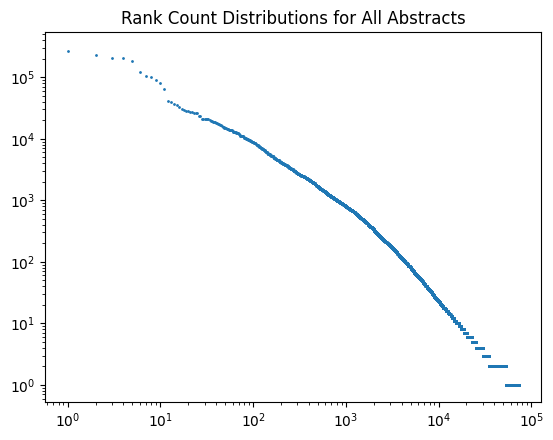

In [26]:

plt.scatter(
    abstracts_parsed['rank'], 
    abstracts_parsed['count'],
    s=1
    )
    
# plt.legend(sources)
plt.xscale('log')
plt.yscale('log')
plt.title('Rank Count Distributions for All Abstracts')

# plt.savefig(
#     '../data/08_reporting/assign13_gutenberg_rankcount.png', 
#     dpi=300, 
#     bbox_inches='tight'
#     )